In [1]:
PATH_ = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\derivatives\\Int_old_grid\\"

In [2]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_score
import os 
from matplotlib import pyplot as plt
import pickle
import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import sys
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

In [3]:
def append_time_dim(arr, y_, time_stamps):
    """
    apply added time dimension for the data array and label given time_stamps (with downsample_rate=100) in 100ms / need to check with 1375Hz
    """
    time_arr = np.zeros([arr.shape[0]-time_stamps, int(time_stamps*arr.shape[1])])
    for time_idx, time_ in enumerate(np.arange(time_stamps, arr.shape[0])):
        for time_point in range(time_stamps):
            time_arr[time_idx, time_point*arr.shape[1]:(time_point+1)*arr.shape[1]] = arr[time_-time_point,:]
    return time_arr, y_[time_stamps:]

In [4]:
def evalerror(preds, dtrain):
        """
        Custom defined r^2 evaluation function
        """
        labels = dtrain.get_label()
        # return a pair metric_name, result. The metric name must not contain a
        # colon (:) or a space since preds are margin(before logistic
        # transformation, cutoff at 0)

        r2 = metrics.r2_score(labels, preds)

        if r2 < 0:
            r2 = 0

        return 'r2', r2

In [56]:
model = xgb.XGBRegressor()
df = pd.DataFrame()
for f in range(len(os.listdir(PATH_))):
    sub_ = os.listdir(PATH_)[f][4:7]
    if sub_ not in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
        continue
    print(sub_)
    with open(PATH_+ '\\'+ os.listdir(PATH_)[f], 'rb') as handle:
        run_ = pickle.load(handle)
        print(run_["ch_names"])
        if len([ch for ch in run_["ch_names"] if "STN" in ch]) == 0:
            continue
        print("PROCESS")
        for ch_idx, ch_ in enumerate([ch for ch in run_["ch_names"] if "MOV" not in ch]):
            if "ECOG" in ch_:
                loc = "ECOG"
            else:
                loc = "STN"
            for label_idx, label in enumerate(run_["label_baseline_corrected"]):
                if run_["label_con_true"][label_idx] is True:
                    lat = "CON"
                else:
                    lat = "IPS"
                X, y = append_time_dim(run_["rf_data_median"][:,ch_idx,:], label, time_stamps=5)
                #res_ = np.mean(cross_val_score(model, X, y, cv=3, scoring="r2", n_jobs=59))
                res_ = xgb.cv(xgb.XGBRegressor().get_params(), dtrain=xgb.DMatrix(X, label=y), 
                              feval=evalerror, nfold=3, shuffle=False).iloc[-1]["test-r2-mean"]
                print(res_)
                if "LEFT" in ch_:
                    hem = "LEFT"
                else:
                    hem = "RIGHT"
                df = df.append({
                    "r2": res_,
                    "ch_": ch_,
                    "sub": sub_,
                    "loc": loc,
                    "lat": lat,
                    "hem" : hem
                }, ignore_index=True)
            

000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
0.0
0.42269033333333333
0.17122433333333334
0.6432570000000001
0.03319833333333334
0.5974119999999999
0.45378300000000005
0.8036583333333334
0.5354450000000001
0.6964053333333333
0.39733233333333334
0.7038266666666667
0.30828099999999997
0.7045253333333333
0.26795566666666665
0.6523736666666666
0.22397266666666668
0.575561
001
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LE

KeyboardInterrupt: 

In [15]:
import verstack

In [12]:
verstack.stratified_continuous_split?

Object `verstack.stratified_continuous_split` not found.


In [19]:
from verstack.stratified_continuous_split import scsplit

In [22]:
scsplit?

In [25]:
y.shape

(2805,)

In [26]:
pd.Series(y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2800    0.0
2801    0.0
2802    0.0
2803    0.0
2804    0.0
Length: 2805, dtype: float64

In [65]:
df_X = pd.DataFrame(X)

In [67]:
df_X["label"] = y_series

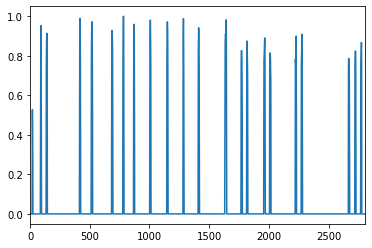

In [41]:
pd.Series(y).plot()

In [59]:
y_series = pd.Series(y)
y_series.name = "label"

In [94]:
y_series = pd.Series(np.arange(0, 1, 0.1))
y_series.name = "label"

In [95]:
X_train, X_test = scsplit(df_X, stratify=y_series)#, continuous=True, test_size=0.2, train_size=0.8)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_tr, X_te, y_tr,y_te = train_test_split(X, y)

(2733, 40)

In [89]:
X_te.shape

(912, 40)

In [90]:
y_tr.shape

(2733,)

(array([2328.,    0.,    0.,    0.,   10.,    8.,    9.,    6.,    4.,
           5.,   13.,    7.,   10.,   11.,   11.,   18.,   29.,   38.,
          30.,   14.]),
 array([0.        , 0.04958088, 0.09916176, 0.14874263, 0.19832351,
        0.24790439, 0.29748527, 0.34706615, 0.39664703, 0.4462279 ,
        0.49580878, 0.54538966, 0.59497054, 0.64455142, 0.6941323 ,
        0.74371317, 0.79329405, 0.84287493, 0.89245581, 0.94203669,
        0.99161757]),
 <a list of 20 Patch objects>)

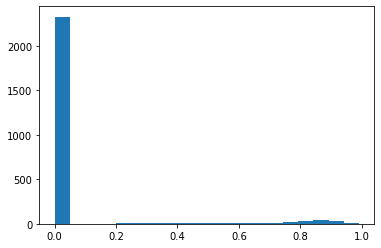

In [97]:
plt.hist(X_train["label"], bins=20)
#plt.hist(y_te, bins=20)

(array([2328.,    0.,    0.,    0.,   10.,    9.,    8.,    6.,    6.,
           6.,   13.,    6.,    9.,   10.,   12.,   18.,   29.,   36.,
          32.,   13.]),
 array([0.        , 0.04955904, 0.09911809, 0.14867713, 0.19823618,
        0.24779522, 0.29735426, 0.34691331, 0.39647235, 0.44603139,
        0.49559044, 0.54514948, 0.59470853, 0.64426757, 0.69382661,
        0.74338566, 0.7929447 , 0.84250375, 0.89206279, 0.94162183,
        0.99118088]),
 <a list of 20 Patch objects>)

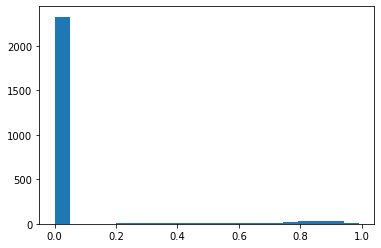

In [85]:
plt.hist(X_train["label"], bins=20)

In [130]:
# make stratification approach 
y_ = np.concatenate(np.array([np.random.randint(5, 10, 800), np.random.randint(0, 10, 200)]))

In [131]:
y_.shape

(1000,)

In [108]:
X_ = np.random.rand(100, 1000).T

In [117]:
X_.shape

(1000, 100)

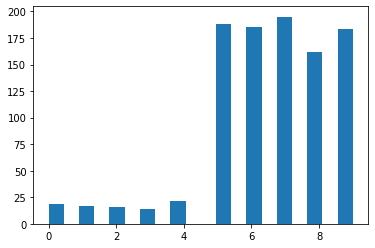

In [132]:
plt.hist(y_, bins=20)
plt.show()

In [122]:
np.array(list(np.arange(0, 10, 1))*100).shape

(1000,)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, \
                                                    stratify =np.array(list(np.arange(0, 10, 1))*100))

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

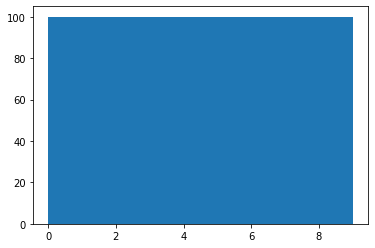

In [126]:
plt.hist(np.array(list(np.arange(0, 10, 1))*100))

(array([ 12.,  11.,  14.,  12.,  17., 141., 136., 146., 119., 142.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

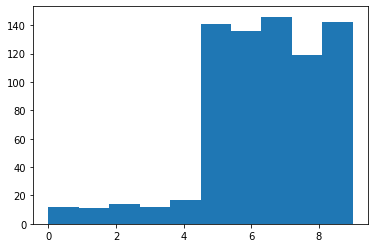

In [134]:
plt.hist(y_train)

(array([ 7.,  6.,  2.,  2.,  4., 47., 49., 49., 43., 41.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

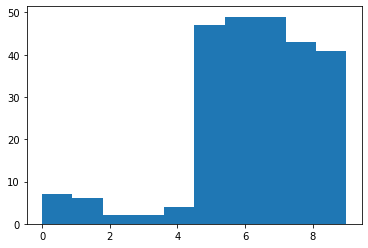

In [135]:
plt.hist(y_test)

In [136]:
train_test_split?

In [47]:
# previous results
df = pd.read_pickle("XGB_all_ECOGSTN_samesize.p")

In [56]:
# get 1. best channels hemisphere wise
df_best = pd.DataFrame()
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    for lat in ["CON", "IPS"]:
        for loc in ["ECOG", "STN"]:
            for hem in ["RIGHT", "LEFT"]:
                df_extr = df[(df["sub"] == sub) & (df["lat"] == lat) & (df["loc"] == loc)]
                df_extr_cpy = df_extr.copy()
                for index, row in df_extr_cpy.iterrows():
                    if hem not in row["ch_"]:
                        df_extr = df_extr.drop(index)
                if df_extr.shape[0] != 0:
                    df_best = df_best.append(df_extr.loc[df_extr["r2"].argmax()], ignore_index=True)

# 2. now avg across hemisphere
df_best__ = pd.DataFrame()
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    for lat in ["CON", "IPS"]:
        for loc in ["ECOG", "STN"]:
            df_extr_cpy = pd.DataFrame()
            for hem in ["RIGHT", "LEFT"]:
                df_extr = df_best[(df_best["sub"] == sub) & (df_best["lat"] == lat) & \
                                  (df_best["loc"] == loc) & (df_best["hem"] == hem)]
                df_extr_cpy = df_extr_cpy.append(df_extr[["lat", "loc", "r2", "sub"]], ignore_index=True)
            if df_extr_cpy.shape[0] == 1:
                df_best__ = df_best__.append(df_extr_cpy, ignore_index=True)
            else:
                df_best__ = df_best__.append({"lat": df_extr_cpy.iloc[0]["lat"], 
                                  "loc": df_extr_cpy.iloc[0]["loc"], 
                                  "r2" : df_extr_cpy["r2"].mean(),
                                  "sub" : sub
                                 }, ignore_index=True)
df_best = df_best__

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  del sys.path[0]


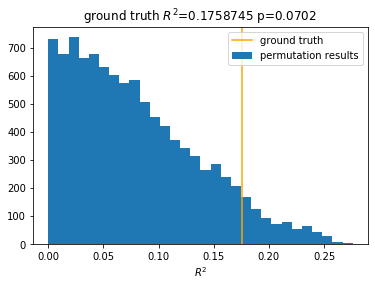

(0.1758745, 0.0702)

In [57]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="CON") & (df_best["loc"] == "ECOG")]["r2"],
                                    df_best[(df_best["lat"]=="CON") & (df_best["loc"] == "STN")]["r2"], True,
                                    r"$R^2$", 10000)

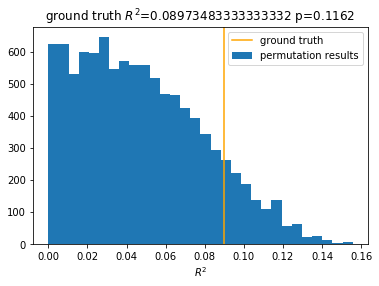

(0.08973483333333332, 0.1162)

In [58]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "ECOG")]["r2"],
                                    df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "STN")]["r2"], True,
                                    r"$R^2$", 10000)

In [9]:
df_best.to_pickle("XGB_best_ECOGSTN_samesize.p")

In [117]:
df_best = pd.read_pickle("XGB_best_ECOGSTN_samesize.p")

In [75]:
df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "STN")]["r2"]

3     0.171224
7     0.063703
11    0.148245
15    0.008619
19    0.043262
23    0.010280
27    0.000000
31    0.000000
35    0.000000
39    0.000000
43    0.000000
Name: r2, dtype: float64

In [72]:
df_best[(df_best["lat"] == "IPS") & (df["loc"] == "STN")]["r2"]

C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2     0.535445
3     0.171224
18    0.278875
19    0.043262
22    0.023520
23    0.010280
Name: r2, dtype: float64

In [76]:
s_ECOG_CON = str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "ECOG")]["r2"].std(),2))
s_ECOG_IPS = str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "ECOG")]["r2"].std(),2))
s_STN_CON = str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "STN")]["r2"].std(),2))
s_STN_IPS = str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "STN")]["r2"].std(),2)) 


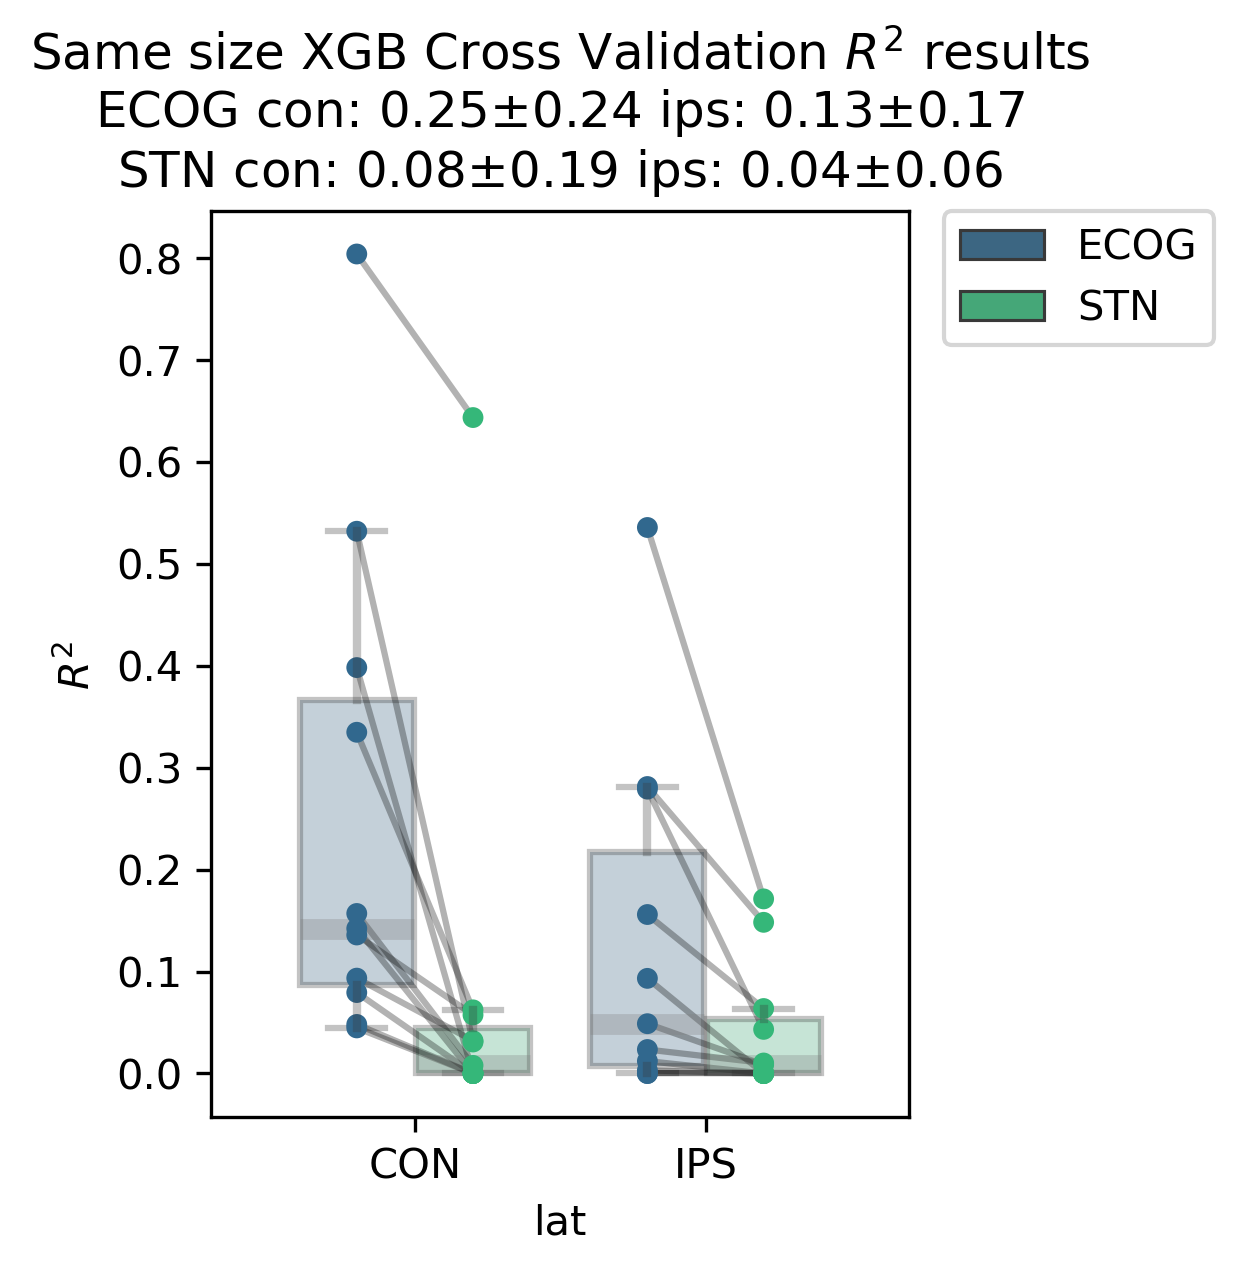

In [77]:
alpha_box = 0.3
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG", "STN"], data=df_best,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False, dodge=True,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=alpha_box))

    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG", "STN"],
             data=df_best, palette="viridis", dodge=True, s=5, jitter=0)
#plt.xticks(rotation=90)

# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Same size XGB Cross Validation "+r"$R^2$"+" results\n"+
          "ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
         "\nSTN con: "+s_STN_CON+ " ips: "+s_STN_IPS)
plt.plot([-0.2,0.2],np.array([df_best[(df_best["loc"]=="ECOG") & (df_best["lat"]=="CON")]["r2"], 
                              df_best[(df_best["loc"]=="STN") & (df_best["lat"]=="CON")]["r2"]]), color='black', alpha=0.3)
plt.plot([0.8,1.2],np.array([df_best[(df_best["loc"]=="ECOG") & (df_best["lat"]=="IPS")]["r2"], 
                              df_best[(df_best["loc"]=="STN") & (df_best["lat"]=="IPS")]["r2"]]), color='black', alpha=0.3)
plt.ylabel(r"$R^2$")
plt.show()

In [79]:
from sklearn.model_selection import KFold

In [88]:
cv = KFold(n_splits=4, shuffle=False)

In [84]:
X = np.random.random([1000,100])

In [85]:
X.shape

(1000, 100)

In [89]:

for train_index, test_index in cv.split(X):
    Xtr, Xte=X[train_index,:], X[test_index,:]
    print(Xte.shape[0] / 1000)

0.25
0.25
0.25
0.25


In [93]:
# COMBINATION ECOG, STN and both
model = linear_model.LinearRegression()
df = pd.DataFrame()
time_stamps = 5

for ch_USED in ["ECOG_STN", "ECOG", "STN"]:
    for f in range(len(os.listdir(PATH_))):
        sub_ = os.listdir(PATH_)[f][4:7]
        if sub_ not in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
            continue
        print(sub_)
        with open(PATH_+ '\\'+ os.listdir(PATH_)[f], 'rb') as handle:
            run_ = pickle.load(handle)
            print(run_["ch_names"])
            if len([ch for ch in run_["ch_names"] if "STN" in ch]) == 0:
                continue
            print("PROCESS")
            X_ = []
            start = True
            for ch_idx, ch_ in enumerate([ch for ch in run_["ch_names"] if "MOV" not in ch]):
                if ch_USED == "ECOG" and "ECOG" not in ch_:
                    continue
                if ch_USED == "STN" and "STN" not in ch_:
                    continue
                #ECOG_STN combines all 
                
                X, y = append_time_dim(run_["rf_data_median"][:,ch_idx,:], \
                                       run_["label_baseline_corrected"][0,:], \
                                       time_stamps=time_stamps)
                if start == True:
                    X_ = X
                    start = False
                else:
                    X_ = np.concatenate((X_, X), axis=1)
            
            print("RES JEREKOÜF")
            for label_idx, label in enumerate(run_["label_baseline_corrected"]):
                res_ = xgb.cv(xgb.XGBRegressor().get_params(), dtrain=xgb.DMatrix(X_, label=label[time_stamps:]), 
                              feval=evalerror, nfold=3, shuffle=False).iloc[-1]["test-r2-mean"]
                
                if res_ < 0:
                    res_ = 0
                if run_["label_con_true"][label_idx] is True:
                    lat = "CON"
                else:
                    lat = "IPS"
                df = df.append({
                    "r2": res_,
                    "ch_": ch_,
                    "sub": sub_,
                    "loc": ch_USED,
                    "lat": lat
                }, ignore_index=True)


000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
RES JEREKOÜF
001
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'ECOG_LEFT_8', 'ECOG_LEFT_9', 'ECOG_LEFT_10', 'ECOG_LEFT_11', 'ECOG_LEFT_12', 'ECOG_LEFT_13', 'ECOG_LEFT_14', 'ECOG_LEFT_15', 'ECOG_LEFT_16', 'ECOG_LEFT_17', 'ECOG_LEFT_18', 'ECOG_LEFT_19', 'ECOG_LEFT_20', 'ECOG_LEFT_21', 'ECOG_LEFT_22', 'ECOG_LEFT_23', 'ECOG_LEFT_24', 'ECOG_LEFT_25', 'ECOG_LEFT_26', 'EC

['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIGHT_27', 'MOV_RIGHT', 'MOV_LEFT']
006
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIG

RES JEREKOÜF
001
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIGHT_27', 'MOV_RIGHT', 'MOV_LEFT']
001
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIGHT_27', 'MOV_RIGHT', 'MOV_LE

RES JEREKOÜF
010
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
010
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
010
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
010
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
010
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
010
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
RES JEREKOÜF
013
['STN_LEFT_0', 'STN_LEFT_1', 'STN_LEFT_2', 'ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
RES JEREKOÜF
013
['

006
['STN_LEFT_0', 'STN_LEFT_1', 'STN_LEFT_2', 'ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'ECOG_LEFT_8', 'ECOG_LEFT_9', 'ECOG_LEFT_10', 'ECOG_LEFT_11', 'ECOG_LEFT_12', 'ECOG_LEFT_13', 'ECOG_LEFT_14', 'ECOG_LEFT_15', 'ECOG_LEFT_16', 'ECOG_LEFT_17', 'ECOG_LEFT_18', 'ECOG_LEFT_19', 'ECOG_LEFT_20', 'ECOG_LEFT_21', 'ECOG_LEFT_22', 'ECOG_LEFT_23', 'ECOG_LEFT_24', 'ECOG_LEFT_25', 'ECOG_LEFT_26', 'ECOG_LEFT_27', 'ECOG_LEFT_28', 'ECOG_LEFT_29', 'ECOG_LEFT_30', 'ECOG_LEFT_31', 'ECOG_LEFT_32', 'ECOG_LEFT_33', 'ECOG_LEFT_34', 'ECOG_LEFT_35', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
RES JEREKOÜF
006
['STN_LEFT_0', 'STN_LEFT_1', 'STN_LEFT_2', 'ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'ECOG_LEFT_8', 'ECOG_LEFT_9', 'ECOG_LEFT_10', 'ECOG_LEFT_11', 'ECOG_LEFT_12', 'ECOG_LEFT_13', 'ECOG_LEFT_14', 'ECOG_LEFT_15', 'ECOG_LEFT_16', 'ECOG_LEFT_17', 'ECOG_LEFT_18', 

In [10]:
model = xgb.XGBRegressor().fit(X_[:2400,:], run_["label_baseline_corrected"][0,:2400])

In [36]:
model_ips = xgb.XGBRegressor().fit(X_[:2400,:], run_["label_baseline_corrected"][1,:2400])

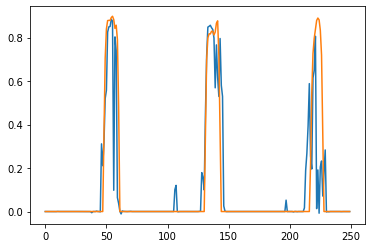

In [44]:
plt.plot(model_ips.predict(X_[2400:2650,:]))
plt.plot(run_["label_baseline_corrected"][1,2400:2650])

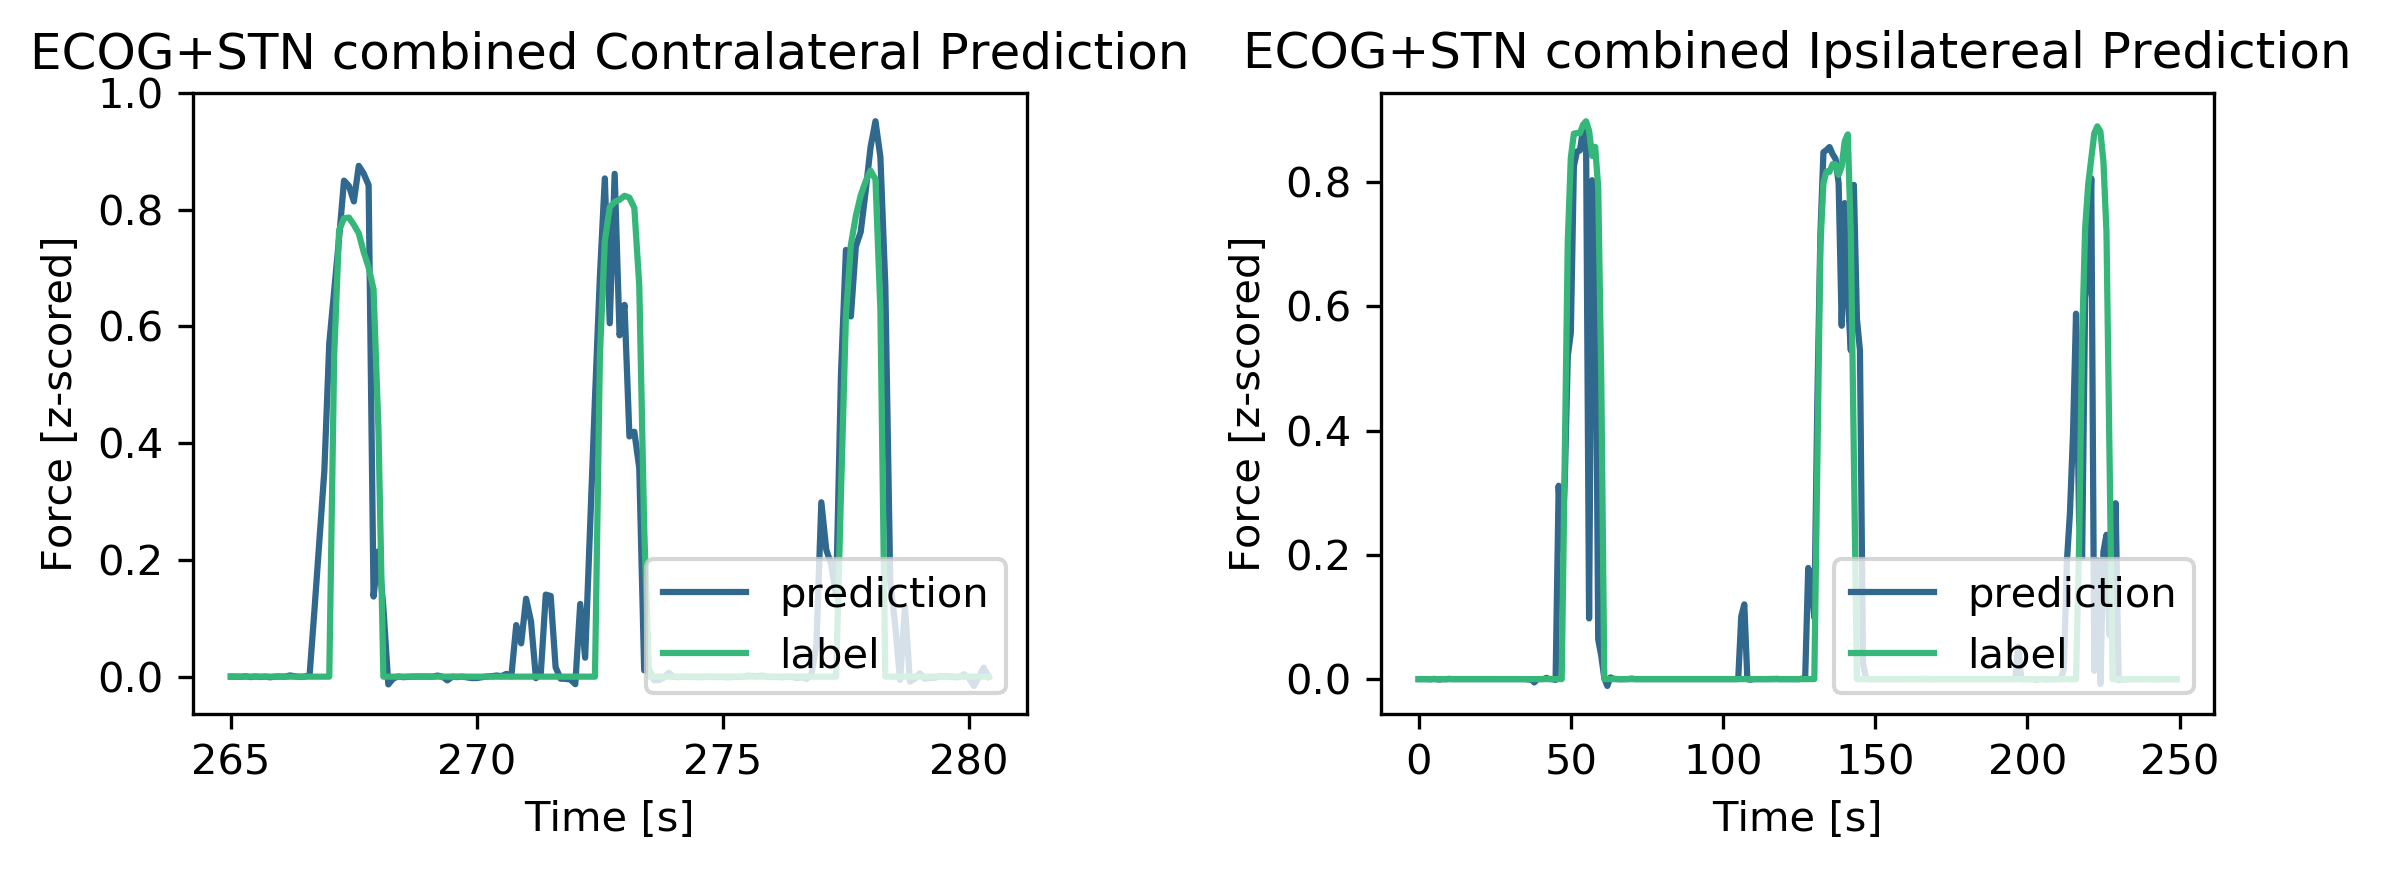

In [53]:
x_ = np.arange(2650, 2650+155, 1)*0.1

plt.figure(figsize=(8,3), dpi=300)
plt.subplot(121)
plt.plot(x_, model.predict(X_[2650:,:]), color=(49/255,104/255,142/255), label="prediction")
plt.title("ECOG+STN combined Contralateral Prediction")
plt.plot(x_, run_["label_baseline_corrected"][0,2650:-5], color=(53/255,183/255,121/255), label="label")
plt.xlabel("Time [s]"); plt.legend(loc="lower right")
plt.ylabel("Force [z-scored]")

plt.subplot(122)
x_ = np.arange(2400, 2650, 1) *0.1
plt.plot(model_ips.predict(X_[2400:2650,:]), color=(49/255,104/255,142/255), label="prediction")
plt.plot(run_["label_baseline_corrected"][1,2400:2650], color=(53/255,183/255,121/255), label="label")
plt.title("ECOG+STN combined Ipsilatereal Prediction")
plt.xlabel("Time [s]"); plt.legend(loc="lower right")
plt.ylabel("Force [z-scored]")
plt.tight_layout()

In [14]:
df.to_pickle("XGB_all_ch_comb_ECOG_STN_ECOGSTN_samesize.p")

In [90]:
df = pd.read_pickle("XGB_all_ch_comb_ECOG_STN_ECOGSTN_samesize.p")

In [57]:
df_best = pd.read_pickle("XGB_best_ECOGSTN_samesize.p")

In [94]:
s_ECOG_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG")]["r2"].std(),2))
s_ECOG_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG")]["r2"].std(),2))
s_STN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "STN")]["r2"].std(),2))
s_STN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].std(),2)) 
s_ECOGSTN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG_STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG_STN")]["r2"].std(),2))
s_ECOGSTN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG_STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG_STN")]["r2"].std(),2))           

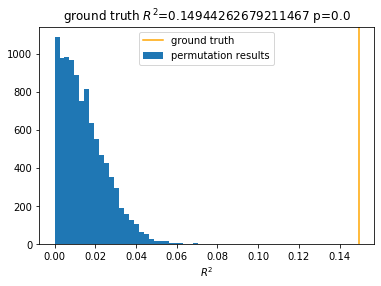

(0.14944262679211467, 0.0)

In [16]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="CON") & (df_best["loc"] == "ECOG")]["r2"],
                                    df[(df["lat"]=="CON") & (df["loc"] == "ECOG")]["r2"], True,
                                    r"$R^2$", 10000)

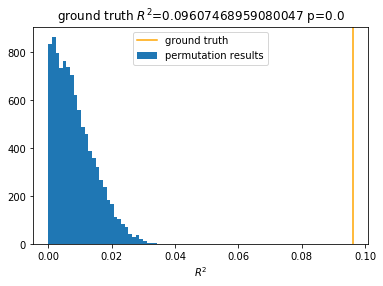

(0.09607468959080047, 0.0)

In [17]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "ECOG")]["r2"],
                                    df[(df["lat"]=="IPS") & (df["loc"] == "ECOG")]["r2"], True,
                                    r"$R^2$", 10000)

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


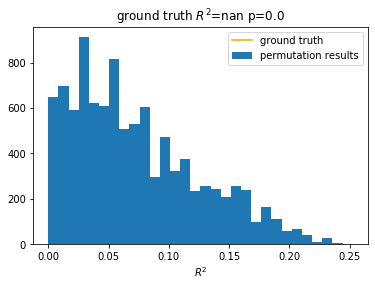

(nan, 0.0)

In [18]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "ECOG")]["r2"],
                                    df[(df["lat"]=="IPS") & (df["loc"] == "ECOG_STN")]["r2"], True,
                                    r"$R^2$", 10000)

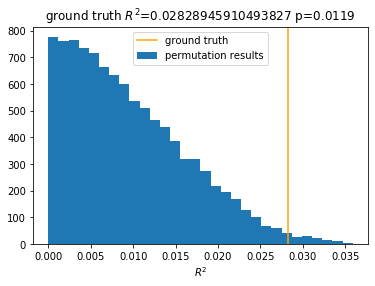

(0.02828945910493827, 0.0119)

In [19]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "STN")]["r2"],
                                    df[(df["lat"]=="IPS") & (df["loc"] == "STN")]["r2"], True,
                                    r"$R^2$", 10000)

In [21]:
df_best_ECOG_best_STN = pd.read_pickle("best_ECOG_best_STN_combined_XGB.p")

In [22]:
# hier wird UPDRS hinzugefügt, ist aber falsch bisher 

for sub in df["sub"].unique():
    df = df.append({
        "loc" : "best ECOG + best STN",
        "r2" : df_best_ECOG_best_STN[(df_best_ECOG_best_STN["sub"] == sub) &\
                      (df_best_ECOG_best_STN["lat"] == "CON") &\
                      (df_best_ECOG_best_STN["fbands"] == "all")]["r2"].iloc[0], 
        "lat" : "CON", 
        "ch_" : 0, 
        "sub" : sub, 
        "UPDRS_total" : df[df["sub"] == sub]["UPDRS_total"].iloc[0]
    }, ignore_index=True)
    df = df.append({
        "loc" : "best ECOG + best STN",
        "r2" : df_best_ECOG_best_STN[(df_best_ECOG_best_STN["sub"] == sub) &\
                      (df_best_ECOG_best_STN["lat"] == "IPS") &\
                      (df_best_ECOG_best_STN["fbands"] == "all")]["r2"].iloc[0], 
        "lat" : "IPS", 
        "ch_" : 0, 
        "sub" : sub, 
        "UPDRS_total" : df[df["sub"] == sub]["UPDRS_total"].iloc[0]
    }, ignore_index=True)

KeyError: 'UPDRS_total'

In [23]:
s_bestECOGbestSTN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "best ECOG + best STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "best ECOG + best STN")]["r2"].std(),2))
s_bestECOGbestSTN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "best ECOG + best STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "best ECOG + best STN")]["r2"].std(),2))           

In [95]:
df["loc"].unique()

array(['ECOG_STN', 'ECOG', 'STN'], dtype=object)

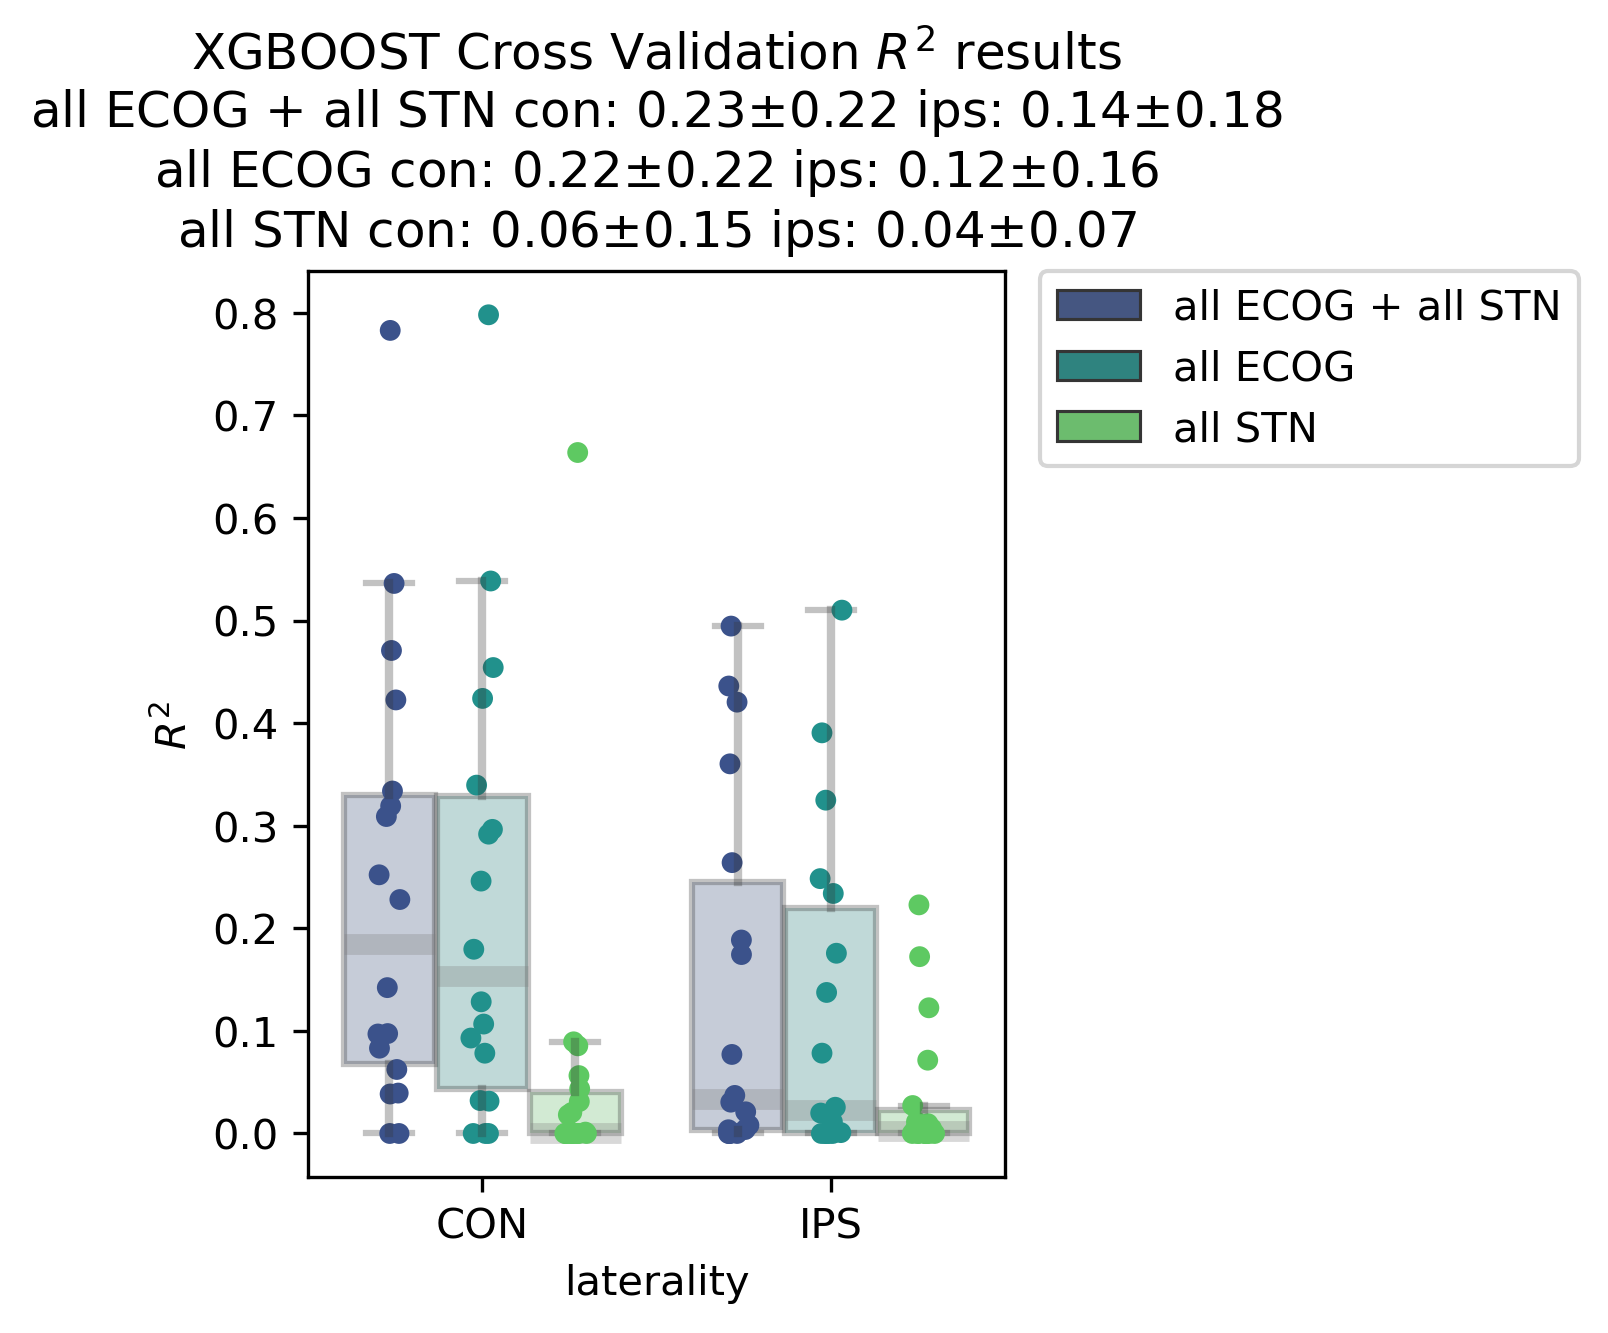

In [96]:
alpha_box = 0.3
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", \
                                                                "ECOG", "STN"], data=df,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=alpha_box))

    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", \
                                                                               "ECOG", "STN"],
             data=df, palette="viridis", dodge=True, s=5)
#plt.xticks(rotation=90)

# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['all ECOG + all STN', 'all ECOG', 'all STN'], \
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("XGBOOST Cross Validation "+r"$R^2$"+" results"+
          "\nall ECOG + all STN con: "+s_ECOGSTN_CON+ " ips: "+s_ECOGSTN_IPS+\
          #"\nbest ECOG + best STN con: "+s_bestECOGbestSTN_CON+ " ips: "+s_bestECOGbestSTN_IPS+\
          "\nall ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
          "\nall STN con: "+s_STN_CON+ " ips: "+s_STN_IPS)
         
plt.ylabel(r"$R^2$")
plt.xlabel("laterality")
plt.show()

Text(0.5, 1.0, 'XGB Cross Validation $R^2$ results\nECOG con: 0.4$\\pm$0.2 ips: 0.3$\\pm$0.19\nSTN con: 0.12$\\pm$0.17 ips: 0.09$\\pm$0.12\nECOG_STN con: 0.4$\\pm$0.18 ips: 0.31$\\pm$0.2')

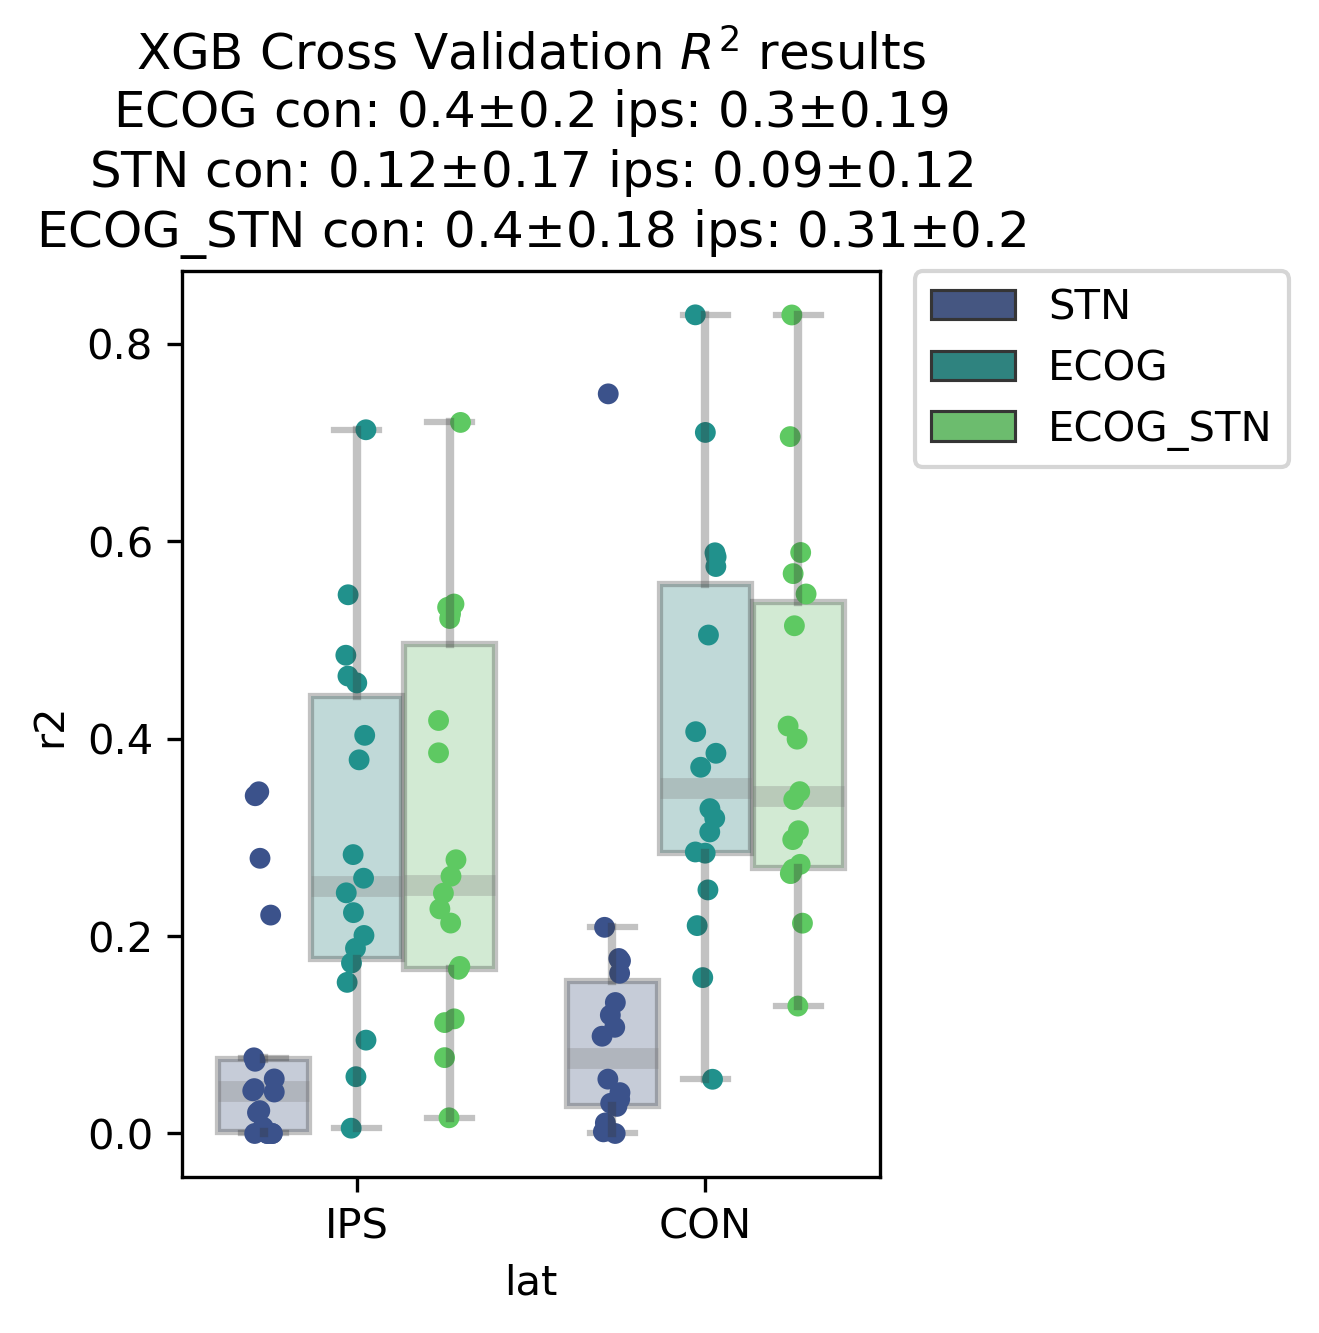

In [74]:
alpha_box = 0.3
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["IPS", "CON"], hue_order=["STN", "ECOG", "ECOG_STN"], data=df,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=alpha_box))

sb.pointplot(x="lat", y="r2", hue="loc", order=["IPS", "CON"], hue_order=["STN", "ECOG", "ECOG_STN"], data=df,
           palette="viridis", alpha=alpha_box)
    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["IPS", "CON"], hue_order=["STN", "ECOG", "ECOG_STN"],
             data=df, palette="viridis", dodge=True, s=5)
#plt.xticks(rotation=90)

# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("XGB Cross Validation "+r"$R^2$"+" results\n"+
         "ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
         "\nSTN con: "+s_STN_CON+ " ips: "+s_STN_IPS+\
         "\nECOG_STN con: "+s_ECOGSTN_CON+ " ips: "+s_ECOGSTN_IPS)


Text(0.5, 1.0, 'XGB Performance comparison for combined channels')

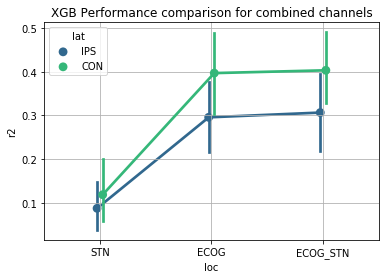

In [15]:
sb.pointplot(x ="loc", y="r2", hue="lat", hue_order=["IPS", "CON"], 
           order=["STN", "ECOG", "ECOG_STN"], data=df,
           palette="viridis", alpha=0.3, dodge=True)
plt.grid(True)
plt.title("XGB Performance comparison for combined channels")

#### Correlation Analysis with UPDRS total

In [15]:
import seaborn as sns
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

In [24]:
df_all = pd.read_csv("..\\df_all.csv", index_col=0)

In [29]:
df["UPDRS_total"] = 0

In [93]:
### add UPDRS to the df table

df_comp = pd.DataFrame()
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    updrs = list(df_all[(df_all["sub"] == int(sub))]["UPDRS_total"])[0]
    df.loc[df["sub"] ==sub, 'UPDRS_total'] = np.repeat(updrs, df[df["sub"] == sub]["UPDRS_total"].shape[0])
    
l_r2 = []; l_updrs = []
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    df_extract = df[(df["loc"] == "ECOG") & (df["sub"] == sub)]; r2_ = []
    for sess_ in ["RIGHT", "LEFT"]:
        if np.isnan(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean()):
            continue
        updrs = list(df_extract[(df_extract["sub"] == sub)]["UPDRS_total"])[0]
        r2_.append(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean())
    df_comp = df_comp.append({
        r"$R^2$":np.array(r2_).mean(),
        "UPDRS_total" : updrs,
        "sub":sub, 
        #"sess":sess_, 
        "loc": "ECOG"
    }, ignore_index=True)
    df_extract = df[(df["loc"] == "ECOG_STN") & (df["sub"] == sub)]; r2_ = []
    for sess_ in ["RIGHT", "LEFT"]:
        if np.isnan(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean()):
            continue
        r2_.append(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean())
    df_comp = df_comp.append({
        r"$R^2$":np.array(r2_).mean(),
        "UPDRS_total" : updrs,
        "sub":sub, 
        #"sess":sess_, 
        "loc": "ECOG+STN"
    }, ignore_index=True)
    df_extract = df[(df["loc"] == "STN") & (df["sub"] == sub)]; r2_ = []
    for sess_ in ["RIGHT", "LEFT"]:
        if np.isnan(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean()):
            continue
        r2_.append(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean())
    df_comp = df_comp.append({
        r"$R^2$":np.array(r2_).mean(),
        "UPDRS_total" : updrs,
        "sub":sub, 
        #"sess":sess_, 
        "loc": "STN"
    }, ignore_index=True)

In [8]:
df_comp

,$R^2$,UPDRS_total,loc,sub
0,0.770967,28.0,ECOG,000
1,0.774609,28.0,ECOG+STN,000
2,0.545616,28.0,STN,000
3,0.532220,27.0,ECOG,001
4,0.551556,27.0,ECOG+STN,001
5,0.116562,27.0,STN,001
6,0.391340,33.0,ECOG,004
7,0.436356,33.0,ECOG+STN,004
8,0.219349,33.0,STN,004
9,0.220328,31.0,ECOG,005


In [95]:
df_comp.to_pickle("df_comp_UPDRS_total_analysis_ECOG+STN_ECOG_STN.p")

In [5]:
df_comp = pd.read_pickle("df_comp_UPDRS_total_analysis_ECOG+STN_ECOG_STN.p")

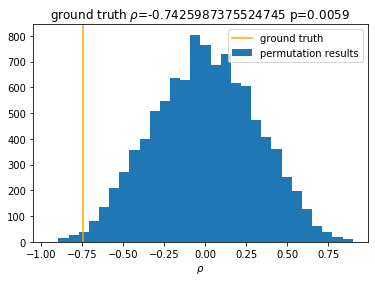

In [11]:
rho_ECOGSTN, p_val_ECOGSTN = icn_permutation_test.permutationTestSpearmansRho(df_comp[df_comp["loc"]=="ECOG+STN"][r"$R^2$"], 
                                            df_comp[df_comp["loc"]=="ECOG+STN"]["UPDRS_total"], True,r"$\rho$", 10000)

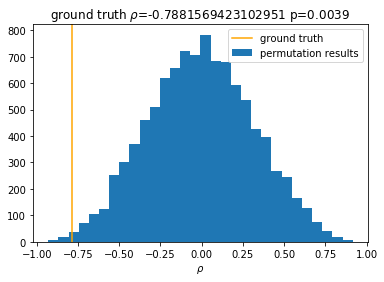

In [12]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_comp[df_comp["loc"]=="ECOG"][r"$R^2$"], 
                                            df_comp[df_comp["loc"]=="ECOG"]["UPDRS_total"], True,r"$\rho$", 10000)

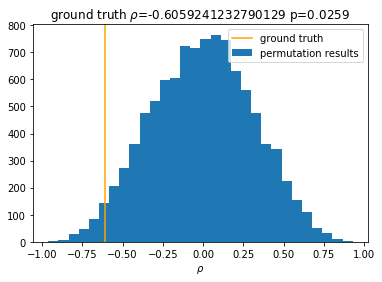

In [13]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_comp[df_comp["loc"]=="STN"][r"$R^2$"], 
                                            df_comp[df_comp["loc"]=="STN"]["UPDRS_total"], True,r"$\rho$", 10000)

C:\Users\ICN_admin\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


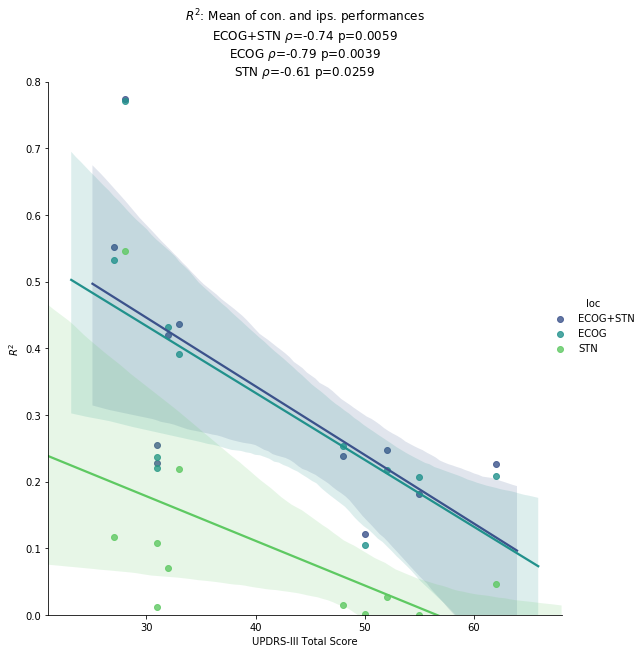

In [26]:
#fig, ax_ = plt.subplots(figsize=(6,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sb.lmplot(x="UPDRS_total", y=r"$R^2$", hue="loc", data=df_comp, hue_order=["ECOG+STN", "ECOG", "STN"], 
            palette="viridis", size=10, height=10, legend=True)
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances\n"+
         "ECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN)+
         "\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+
         "\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(0, 0.8)
ax.fig.set_figheight(8)
ax.fig.set_figwidth(9)
plt.savefig('our_plot_name.jpg', format='png', dpi=300, bbox_inches='tight')

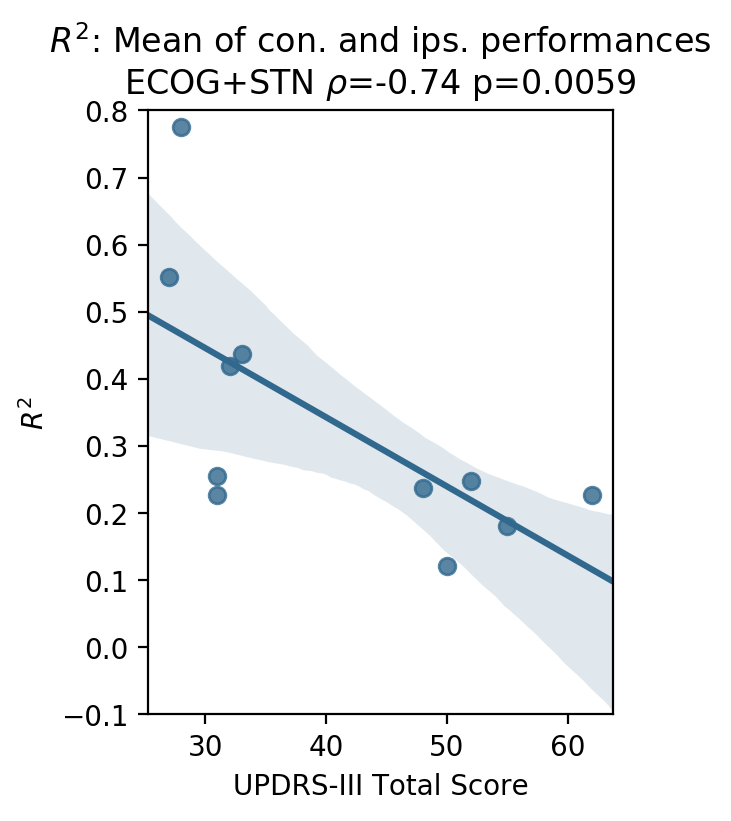

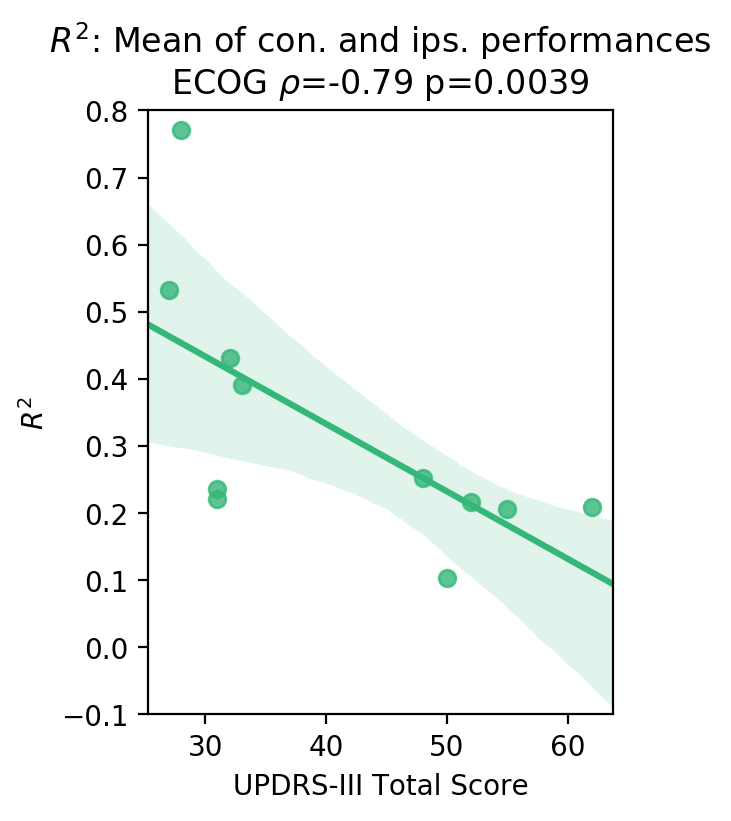

(-0.1, 0.8)

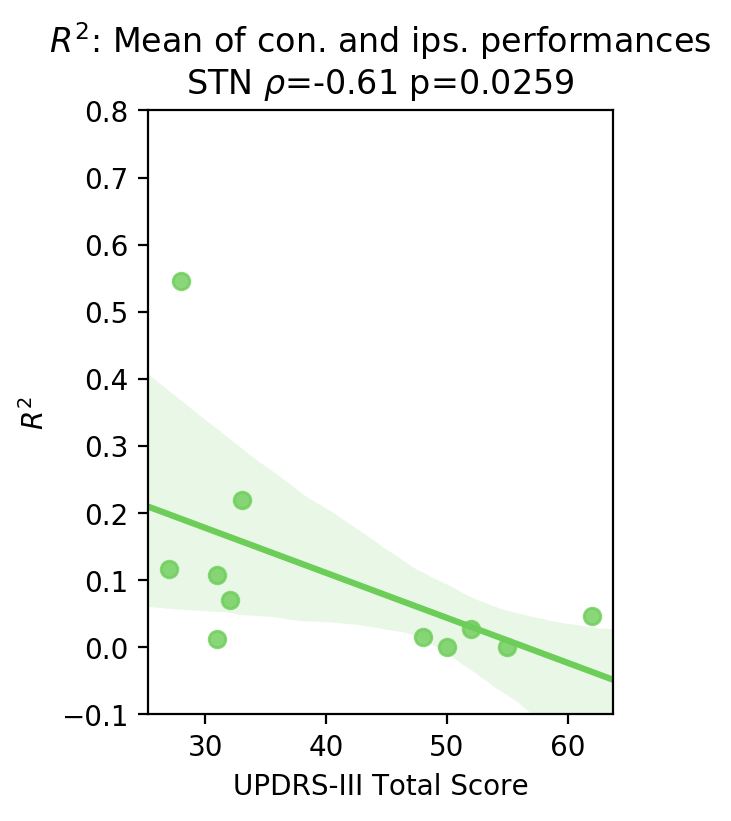

In [44]:
fig, ax_ = plt.subplots(figsize=(3,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sb.regplot(x="UPDRS_total", y=r"$R^2$", data=df_comp[df_comp["loc"]=="ECOG+STN"], color=(49/255,104/255,142/255))
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances"+
         "\nECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN))
         #"\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+
         #"\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(-0.1, 0.8)
plt.show()
fig, ax_ = plt.subplots(figsize=(3,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sb.regplot(x="UPDRS_total", y=r"$R^2$", data=df_comp[df_comp["loc"]=="ECOG"], color=(53/255,183/255,121/255))
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances"+
         #"ECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN)+
         "\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG))
         #"\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(-0.1, 0.8)
plt.show()
fig, ax_ = plt.subplots(figsize=(3,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sb.regplot(x="UPDRS_total", y=r"$R^2$", data=df_comp[df_comp["loc"]=="STN"], color=(109/255,205/255,89/255))
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances"+
         #"ECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN)+
         #"\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+
         "\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(-0.1, 0.8)